# Margaret Lynch - Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

# Section 1(a) - Importing data (Per Vehicle Records)

* Data is available from the Transport Infrastructure Ireland ("TII") website
* Data scraped from the API as described on the website to import 

The format of the files are CSV and are accessible by specifying the date in yyyy/MM/dd format as follows:

* https://data.tii.ie/Datasets/TrafficCountData/yyyy/MM/dd/per-vehicle-records-yyyy-MM-dd.csv
* https://data.tii.ie/Datasets/TrafficCountData/yyyy/MM/dd/per-site-class-aggr-yyyy-MM-dd.csv
* https://data.tii.ie/Datasets/TrafficCountData/yyyy/MM/dd/per-site-minutes-aggr-yyyy-MM-dd.csv

Function created to generate the url and read the data

In [2]:
def get_url(year, month, day, file_type):
    date_folder = str(year) +"/" + str(month).zfill(2) +"/" + str(day).zfill(2)
    file_name = "/" + file_type + "-" + str(year) + "-" + str(month).zfill(2) + "-" + str(day).zfill(2) + ".csv"
    url = "https://data.tii.ie/Datasets/TrafficCountData/" + date_folder + file_name
    
    return url

In [3]:
def get_data_for_day(year, month, day, file_type):
    data = pd.read_csv(get_url(year, month, day, file_type), low_memory = False)
    
    return data

#### Test the functions for each date and file type

In [4]:
file_types = ["per-vehicle-records", "per-site-class-aggr", "per-site-minutes-aggr"]

for file_type in file_types:
    print(get_url(2020, 4, 6, file_type))

https://data.tii.ie/Datasets/TrafficCountData/2020/04/06/per-vehicle-records-2020-04-06.csv
https://data.tii.ie/Datasets/TrafficCountData/2020/04/06/per-site-class-aggr-2020-04-06.csv
https://data.tii.ie/Datasets/TrafficCountData/2020/04/06/per-site-minutes-aggr-2020-04-06.csv


In [5]:
for file_type in file_types:
    print(get_url(2019, 4, 1, file_type))

https://data.tii.ie/Datasets/TrafficCountData/2019/04/01/per-vehicle-records-2019-04-01.csv
https://data.tii.ie/Datasets/TrafficCountData/2019/04/01/per-site-class-aggr-2019-04-01.csv
https://data.tii.ie/Datasets/TrafficCountData/2019/04/01/per-site-minutes-aggr-2019-04-01.csv


In [6]:
#now using the get_data_for_day function

In [7]:
data_2020_psm = get_data_for_day(2020, 4, 6, "per-site-minutes-aggr")
data_2019_psm = get_data_for_day(2019, 4, 1, "per-site-minutes-aggr")
data_2020_psc = get_data_for_day(2020, 4, 6, "per-site-class-aggr")
data_2019_psc = get_data_for_day(2019, 4, 1, "per-site-class-aggr")
data_2020_pvr = get_data_for_day(2020, 4, 6, "per-vehicle-records")
data_2019_pvr = get_data_for_day(2019, 4, 1, "per-vehicle-records")

In [8]:
#  an alternative to using web scraping to import the data would be to download and save the .csv files locally and import using pd.read_csv("filepath")
#  the analysis below primarily uses the per-vehicle-records data but the aggregated data was loaded in case it may be useful

# Section 1(b) - Importing data (Traffic Counter Location)

* TII also provide a JSON file with information on the location of their counter sites
* This data is loaded here

In [9]:
# loading JSON location data from TII website
json_filename = "C:/Users/Margaret/Desktop/Datasets/tii_location.json"

with open(json_filename, "r") as json_file:
    json_data = json.load(json_file)

In [10]:
type(json_data)

list

In [11]:
# inspect the first element
json_data[0]

{'node': 'NRA',
 'cosit': '000000000997',
 'name': 'test',
 'description': 'Test site for AFMS',
 'location': {'lat': 53.3989, 'lng': -6.34177}}

In [12]:
len(json_data)

446

In [13]:
# converting the JSON data to a pandas DataFrame
tii_location = pd.DataFrame(json_data)

# Section 2 - Removing missing values from location DataFrame

* Some of the location values ("cosit") are not in a consistent format and must be converted to numbers
* This conversion results in missing values which are removed

In [14]:
tii_location.tail()

,node,cosit,name,description,location
441,NRA,MAC000400719,Bluetooth 400719,M07 Between Jn25 Nenagh (Central) and Jn26 Nen...,"{'lat': 52.84832, 'lng': -8.16953}"
442,NRA,MAC000400720,Bluetooth 400720,M07 Between Jn26 Nenagh (West) and Jn27 Birdhi...,"{'lat': 52.76195, 'lng': -8.39795}"
443,NRA,MAC000400721,Bluetooth 400721,"M07 Between Jn27 Birdhill and J28 Castletroy, ...","{'lat': 52.75285, 'lng': -8.41886}"
444,NRA,MAC000400722,Bluetooth 400722,M07 Between Jn28 Castletroy and Jn29 M07/N24 B...,"{'lat': 52.66726, 'lng': -8.51609}"
445,NRA,MAC000400723,Bluetooth 400723,N07 Westbound Between Jn05 Athgoe and Jn06 Cas...,"{'lat': 53.25975, 'lng': -6.5458}"


From the above some of "cosit" (site location) values are not numbers. In order to remove these unusable values, they will be converted to integers. This will also facilitate merging with another data set. 

In [15]:
tii_location["cosit"] = pd.to_numeric(tii_location["cosit"], errors = "coerce")

In [16]:
tii_location = tii_location.dropna()

In [17]:
tii_location["cosit"] = tii_location["cosit"].astype(int)

#### Reviewing tail to ensure inconsistent values no longer appear

In [18]:
tii_location.tail()

,node,cosit,name,description,location
417,NRA,920042,20042 WIM Site reprocessed data,20042 WIM Site reprocessed data,"{'lat': 0, 'lng': 0}"
418,NRA,920073,20073 WIM Site reprocessed data,20073 WIM Site reprocessed data,"{'lat': 0, 'lng': 0}"
419,NRA,2007231,TMU N07 015.0 E,N07 Eastbound Between Jn05 Athgoe and Jn06 Cas...,"{'lat': 53.26006, 'lng': -6.54598}"
420,NRA,8888888,test,test,"{'lat': 53, 'lng': -6}"
421,NRA,9200723,200723 WIM Site reprocessed data,200723 WIM Site reprocessed data,"{'lat': 53.25975, 'lng': -6.5458}"


In [19]:
cosit_description = ["cosit", "description"]

In [20]:
tii_location_cosit_location = tii_location.loc[:, cosit_description]

In [21]:
tii_location_cosit_location.head()
# This will be used in conjunction with the Per Vehicle Record data at a later stage

,cosit,description
0,997,Test site for AFMS
1,998,Test site 2
2,999,Test Site
3,1011,M01 Airport Link Road Between R132 Swords Road...
4,1012,M50 Between Jn02 Santry and Jn03 M50/M1


# Section 3(a) - Class of vehicle analysis

* Calculate proportion each class of vehicle represents

In [22]:
class_count_2020 = data_2020_pvr["classname"].value_counts()
class_count_2020

CAR        1779724
LGV         401650
HGV_ART     291420
HGV_RIG     115979
BUS          22344
CARAVAN      17374
MBIKE        10169
Name: classname, dtype: int64

In [23]:
class_prop_2020 = class_count_2020/np.sum(class_count_2020)
class_prop_2020

CAR        0.674480
LGV        0.152217
HGV_ART    0.110442
HGV_RIG    0.043954
BUS        0.008468
CARAVAN    0.006584
MBIKE      0.003854
Name: classname, dtype: float64

In [24]:
class_count_2019 = data_2019_pvr["classname"].value_counts()
class_count_2019

CAR        6163324
LGV         884675
HGV_ART     377849
HGV_RIG     205690
BUS          56827
CARAVAN      40700
MBIKE        26569
Name: classname, dtype: int64

In [25]:
class_prop_2019 = class_count_2019/np.sum(class_count_2019)
class_prop_2019

CAR        0.794690
LGV        0.114069
HGV_ART    0.048719
HGV_RIG    0.026521
BUS        0.007327
CARAVAN    0.005248
MBIKE      0.003426
Name: classname, dtype: float64

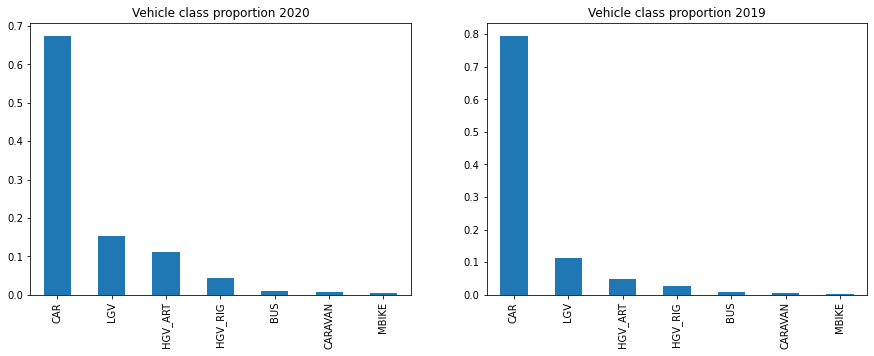

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
class_prop_2020.plot(kind = "bar", title = "Vehicle class proportion 2020", ax = ax[0])
class_prop_2019.plot(kind = "bar", title = "Vehicle class proportion 2019", ax = ax[1])
fig.savefig("C://Users/Margaret/Desktop/Datasets/TII/Vehicle class prop.png")

# Section 3(b) - Filtering and Sorting the Per Vehicle Record data 

* List columns of interest
* Reduce DataFrame to these columns
* Examine top 20 busiest sited for both days

In [27]:
interesting_columns = ["cosit", "minuteofday", "classname", "speed"]
# These are the columns from each year that I want to analyse

In [28]:
data_2020_pvr_filter = data_2020_pvr.loc[:, interesting_columns]
data_2019_pvr_filter = data_2019_pvr.loc[:, interesting_columns]

In [29]:
data_2020_pvr_filter

,cosit,minuteofday,classname,speed
0,997,180,LGV,70.0
1,997,180,CAR,66.0
2,997,180,LGV,71.0
3,997,180,HGV_RIG,70.0
4,997,180,LGV,69.0
...,...,...,...,...
2639201,208001,434,CAR,69.0
2639202,208001,434,CAR,64.0
2639203,208001,434,CAR,63.0
2639204,208001,434,LGV,77.0


In [30]:
#  To display the top 20 busiest sites for 2020, I have created a top_sites DataFrame. 
#  The rows of this have been counted using .size()
#  "count" has been included as a column heading for the result
#  The "count" column is then sorted in descending order
#  The top 20 sites and shown using .head(20)
top_sites_2020 = pd.DataFrame(data_2020_pvr_filter.groupby(["cosit"]).size())
top_sites_2020.columns = ["count"]
top_sites_2020 = top_sites_2020.sort_values("count", ascending = False)
top_20_sites_2020 = top_sites_2020.head(20)

In [31]:
#  the same process as outlined above for 2020 was applied to the 2019 data
top_sites_2019 = pd.DataFrame(data_2019_pvr_filter.groupby(["cosit"]).size())
top_sites_2019.columns = ["count"]
top_sites_2019 = top_sites_2019.sort_values("count", ascending = False)
top_20_sites_2019 = top_sites_2019.head(20)

In [32]:
top_20_sites_2020

,count
cosit,
1502,52110
997,51786
1503,51462
1508,49278
1501,48017
1509,42573
1014,41897
1070,40698
1071,40461


In [33]:
top_20_sites_2019

,count
cosit,
1503,154836
1508,153995
1502,152896
1501,144959
1014,142512
1509,139798
1500,130922
1504,127220
1505,121069


# Section 4(a) - Busiest sites common to 2020 and 2019

* Merge top 20 sites for each day to see common sites


In [34]:
#  The top 20 sites for each day have been merged to show the sites that are common to both years
common_sites_2020_2019 = top_20_sites_2020.merge(top_20_sites_2019, on ="cosit", suffixes=["_2020", "_2019"])

In [35]:
common_sites_2020_2019

,count_2020,count_2019
cosit,,
1502,52110,152896
1503,51462,154836
1508,49278,153995
1501,48017,144959
1509,42573,139798
1014,41897,142512
1071,40461,112406
1072,38327,107542
20011,38021,107855


In [36]:
common_sites_2020_2019.shape
# There are 18 of the top 20 busies sites common to 2020 and 2019

(18, 2)

# Section 4 (b) - Statistical analysis of 2020 v 2019 using NumPy

* Merge filtered DataFrames to get count data across all common sites
* Analyse the change in counts between years e.g. biggest change, smallest change, average change

In [37]:
top_sites_2020.head()

,count
cosit,
1502,52110
997,51786
1503,51462
1508,49278
1501,48017


In [38]:
total_common_sites = top_sites_2020.merge(top_sites_2019, on = "cosit", suffixes = ["_2020", "_2019"])
total_common_sites.head()

,count_2020,count_2019
cosit,,
1502,52110,152896
1503,51462,154836
1508,49278,153995
1501,48017,144959
1509,42573,139798


In [39]:
total_common_sites_location = total_common_sites.merge(tii_location_cosit_location, on="cosit")
total_common_sites_location.head()

,cosit,count_2020,count_2019,description
0,1502,52110,152896,"M50 Between Jn06 N03/M50 and Jn05 N02/M50, Fin..."
1,1503,51462,154836,M50 Between Jn07 N04/M50 and Jn09 N07/M50 Red ...
2,1508,49278,153995,"M50 Between Jn06 N03/M50 and Jn07 N04/M50, Cas..."
3,1501,48017,144959,"M50 Between Jn05 N02/M50 and Jn04 Ballymun, Fi..."
4,1509,42573,139798,M50 Between Jn09 N07/M50 Red Cow and Jn10 Ball...


In [40]:
total_common_sites_location["2020_vs_2019_%reduction"] = 100-(total_common_sites_location["count_2020"] / total_common_sites_location["count_2019"]*100)
total_common_sites_location.head()

,cosit,count_2020,count_2019,description,2020_vs_2019_%reduction
0,1502,52110,152896,"M50 Between Jn06 N03/M50 and Jn05 N02/M50, Fin...",65.918010
1,1503,51462,154836,M50 Between Jn07 N04/M50 and Jn09 N07/M50 Red ...,66.763543
2,1508,49278,153995,"M50 Between Jn06 N03/M50 and Jn07 N04/M50, Cas...",68.000260
3,1501,48017,144959,"M50 Between Jn05 N02/M50 and Jn04 Ballymun, Fi...",66.875461
4,1509,42573,139798,M50 Between Jn09 N07/M50 Red Cow and Jn10 Ball...,69.546775


#### Compute some statistics on the % reduction in traffic between 2020 and 2019

In [41]:
print("the minimum % reduction is " + str(np.min(total_common_sites_location["2020_vs_2019_%reduction"])))
print("the maximum % reduction is " + str(np.max(total_common_sites_location["2020_vs_2019_%reduction"])))
print("the mean % reduction is " + str(np.mean(total_common_sites_location["2020_vs_2019_%reduction"])))
print("the median % reduction is " + str(np.median(total_common_sites_location["2020_vs_2019_%reduction"])))
print("the standard deviation % reduction is " + str(np.std(total_common_sites_location["2020_vs_2019_%reduction"])))

the minimum % reduction is 14.473684210526315
the maximum % reduction is 85.57405036278276
the mean % reduction is 64.0159308508064
the median % reduction is 64.8654037886341
the standard deviation % reduction is 7.459568787953465


In [42]:
minimum_reduction = np.min(total_common_sites_location["2020_vs_2019_%reduction"])
total_common_sites_location.loc[total_common_sites_location["2020_vs_2019_%reduction"]==minimum_reduction]

,cosit,count_2020,count_2019,description,2020_vs_2019_%reduction
195,1291,3315,3876,N29 Between Slieverue and Belview Port,14.473684


In [43]:
maximum_reduction = np.max(total_common_sites_location["2020_vs_2019_%reduction"])
total_common_sites_location.loc[total_common_sites_location["2020_vs_2019_%reduction"]==maximum_reduction]

,cosit,count_2020,count_2019,description,2020_vs_2019_%reduction
310,1512,676,4686,N51 Slane to M1 /junction 10,85.57405


# Section 5 - Location of busiest common sites

* Extract the cosit and site description from the location dataset
* Merge with common sites DataFrame to see locations for these sites

In [44]:
common_sites_2020_2019_location = common_sites_2020_2019.merge(tii_location_cosit_location, on="cosit")

In [45]:
pd.set_option("max_colwidth", 80)
common_sites_2020_2019_location

,cosit,count_2020,count_2019,description
0,1502,52110,152896,"M50 Between Jn06 N03/M50 and Jn05 N02/M50, Finglas, Co. Dublin"
1,1503,51462,154836,"M50 Between Jn07 N04/M50 and Jn09 N07/M50 Red Cow, Palmerstown, Co. Dublin"
2,1508,49278,153995,"M50 Between Jn06 N03/M50 and Jn07 N04/M50, Castleknock, Co. Dublin"
3,1501,48017,144959,"M50 Between Jn05 N02/M50 and Jn04 Ballymun, Finglas, Co. Dublin"
4,1509,42573,139798,"M50 Between Jn09 N07/M50 Red Cow and Jn10 Ballymount, Ballymount, Co. Dublin"
5,1014,41897,142512,M01 Between Jn01 M50/M01 and Jn02 Dublin Airport
6,1071,40461,112406,"N07 Between Jn02 Kingswood and Jn03 Citywest, Kingswood, Co. Dublin"
7,1072,38327,107542,"N07 Between Jn01a Newlands Cross and Jn02 Kingswood, Co. Dublin"
8,20011,38021,107855,"M01 Between Jn02 Dublin Airport and Jn03 Swords, Swords, Co. Dublin"
9,1500,37699,130922,"M50 Between Jn3 M50/M01 and Jn04 Ballymun, Ballymun, Co. Dublin"


In [46]:
# The majority of the top 20 busiest sites are in the Dublin region

# Section 6 - Compare traffic levels 2020 v 2019

* Add column to show % reduction in traffic in 2020 compared to 2019
* Plot traffic level at busiest common sites in 2020 and 2019

In [47]:
common_sites_2020_2019["2020_vs_2019_%reduction"] = 100-(common_sites_2020_2019["count_2020"] / common_sites_2020_2019["count_2019"]*100)

In [48]:
common_sites_2020_2019

,count_2020,count_2019,2020_vs_2019_%reduction
cosit,,,
1502,52110,152896,65.918010
1503,51462,154836,66.763543
1508,49278,153995,68.000260
1501,48017,144959,66.875461
1509,42573,139798,69.546775
1014,41897,142512,70.601072
1071,40461,112406,64.004591
1072,38327,107542,64.360901
20011,38021,107855,64.748041


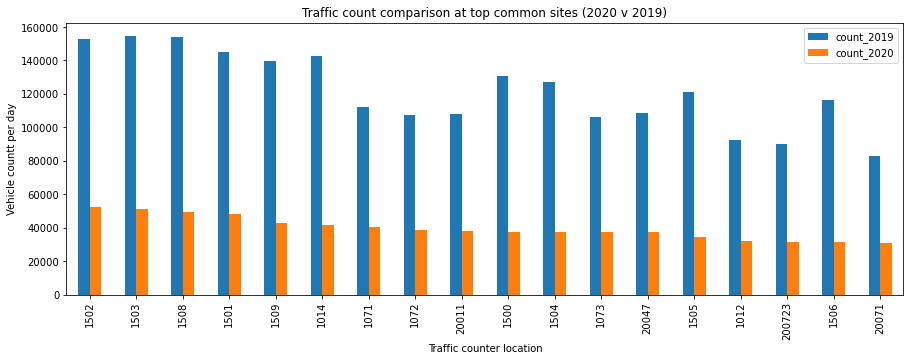

In [49]:
ax = common_sites_2020_2019[["count_2019", "count_2020"]].plot(kind="bar", figsize = (15,5), title = "Traffic count comparison at top common sites (2020 v 2019)")
ax.set_xlabel("Traffic counter location")
ax.set_ylabel("Vehicle countt per day")
plt.gcf().savefig("C://Users/Margaret/Desktop/Datasets/TII/Traffic_comparison.png")

# Section 7 - Distribution of speed 

* Filter to get data for cars only for each day
* Plot distribution of speed side by side

In [50]:
data_2020_pvr_filter.head()

,cosit,minuteofday,classname,speed
0,997,180,LGV,70.0
1,997,180,CAR,66.0
2,997,180,LGV,71.0
3,997,180,HGV_RIG,70.0
4,997,180,LGV,69.0


In [51]:
data_2020_pvr_filter["classname"].value_counts()

CAR        1779724
LGV         401650
HGV_ART     291420
HGV_RIG     115979
BUS          22344
CARAVAN      17374
MBIKE        10169
Name: classname, dtype: int64

In [52]:
car_data_2020 = data_2020_pvr_filter.loc[data_2020_pvr_filter["classname"]=="CAR",["classname", "speed"]]
car_data_2019 = data_2019_pvr_filter.loc[data_2019_pvr_filter["classname"]=="CAR",["classname", "speed"]]

In [53]:
car_data_2020.head()

,classname,speed
1,CAR,66.0
68,CAR,61.0
110,CAR,63.0
116,CAR,60.0
171,CAR,68.0


In [54]:
car_data_2019.head()

,classname,speed
0,CAR,66.0
1,CAR,62.0
2,CAR,62.0
3,CAR,69.0
4,CAR,59.0


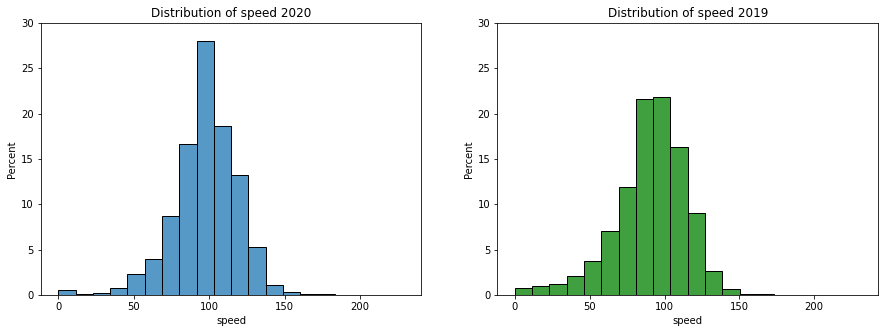

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax_2020 = sns.histplot(data=car_data_2020["speed"], bins = 20, stat="percent", ax=ax[0])
ax_2020.set_title("Distribution of speed 2020")
ax_2020.set(ylim=(0,30))

ax_2019 = sns.histplot(data=car_data_2019["speed"], bins = 20, stat="percent", ax=ax[1], color = "green")
ax_2019.set_title("Distribution of speed 2019")
ax_2019.set(ylim=(0,30))
fig.savefig("C://Users/Margaret/Desktop/Datasets/TII/SpeedDistribution.png")

# Section 8 - Analysis of single site speed for cars

* Pick the busiest site for 2020 and 2019
* Extract all car data
* Analyse timeseries of speed over the course of the day
* Plot timeseres for 2020 and 2019

In [56]:
busiest_site_2020 = common_sites_2020_2019.sort_values("count_2020", ascending = False).head(1).index[0]
busiest_site_2020

1502

In [57]:
busiest_site_2019 = common_sites_2020_2019.sort_values("count_2019", ascending = False).head(1).index[0]
busiest_site_2019

1503

In [58]:
car_data_busiest_2020 = data_2020_pvr_filter.loc[(data_2020_pvr_filter["cosit"]==busiest_site_2020) & (data_2020_pvr_filter["classname"]=="CAR")]
car_data_busiest_2020 = car_data_busiest_2020.sort_values("minuteofday", ascending=True)
car_data_busiest_2020.head()

,cosit,minuteofday,classname,speed
92894,1502,0,CAR,95.0
92897,1502,0,CAR,120.0
92898,1502,0,CAR,96.0
92899,1502,0,CAR,92.0
92903,1502,1,CAR,96.0


In [59]:
car_data_busiest_2019 = data_2019_pvr_filter.loc[(data_2019_pvr_filter["cosit"]==busiest_site_2019) & (data_2019_pvr_filter["classname"]=="CAR")]
car_data_busiest_2019 = car_data_busiest_2019.sort_values("minuteofday", ascending = True)
car_data_busiest_2019.head()

,cosit,minuteofday,classname,speed
677699,1503,0,CAR,93.0
677716,1503,0,CAR,93.0
677717,1503,0,CAR,98.0
677718,1503,0,CAR,130.0
677719,1503,0,CAR,115.0


In [60]:
avg_car_speed_2020 = car_data_busiest_2020.groupby("minuteofday")[["speed"]].mean()

In [61]:
avg_car_speed_2019 = car_data_busiest_2019.groupby("minuteofday")[["speed"]].mean()

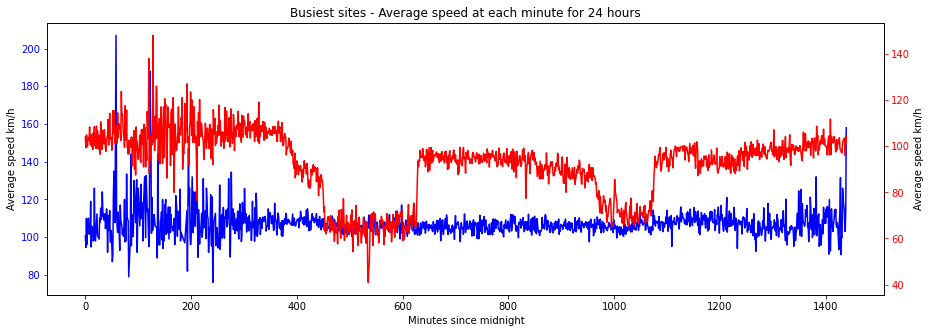

In [62]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(avg_car_speed_2020.index, avg_car_speed_2020["speed"], color = "blue")
ax.tick_params("y", colors = "blue")
ax.set_title("Busiest sites - Average speed at each minute for 24 hours")
ax.set_xlabel("Minutes since midnight")
ax.set_ylabel ("Average speed km/h")
ax2 = ax.twinx()
ax2.plot(avg_car_speed_2019.index, avg_car_speed_2019["speed"], color = "red")
ax2.tick_params("y", colors = "red")
ax2.set_ylabel("Average speed km/h")
fig.savefig("C://Users/Margaret/Desktop/Datasets/TII/Avg_speed_timeseries")